# **EXERCISE ON REGRESSION WITH ADABOOST**


**I will process the database that I have collected from the following address: https://www.kaggle.com/code/kevsde/eda-and-madrid-house-price-prediction/input**

**This is a project to predict the price of housing in Madrid, based on certain factors such as the size of the house, the district in which it is located, number of rooms, elevator, garage, etc.**.

# Dataframe Analysis and Data Restructuring

In [1]:
!pip install --q validclust


[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: C:\Users\curso\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from typing import List, Tuple, Dict
import seaborn as sns


url='https://drive.google.com/file/d/1Wp4uzhk9DpIhJhqIl-HrgecDEFHOJE8i/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
data = pd.read_csv(dwn_url, sep=",")

data.head(6)

,price,house_type,house_type_2,rooms,m2,elevator,garage,neighborhood,district
0,495000,planta 1,exterior,3,118.0,True,True,Chopera,Arganzuela
1,485000,planta 2,exterior,2,82.0,True,True,Palos de Moguer,Arganzuela
2,315000,planta 2,exterior,2,72.0,False,False,Legazpi,Arganzuela
3,585000,planta 4,exterior,2,174.0,True,True,Palos de Moguer,Arganzuela
4,255000,bajo,exterior,3,75.0,False,False,Acacias,Arganzuela
5,299000,planta 1,exterior,1,69.0,True,False,Chopera,Arganzuela


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15975 entries, 0 to 15974
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         15975 non-null  int64  
 1   house_type    15975 non-null  object 
 2   house_type_2  15506 non-null  object 
 3   rooms         15975 non-null  int64  
 4   m2            15975 non-null  float64
 5   elevator      15975 non-null  bool   
 6   garage        15975 non-null  bool   
 7   neighborhood  15975 non-null  object 
 8   district      15975 non-null  object 
dtypes: bool(2), float64(1), int64(2), object(4)
memory usage: 905.0+ KB


**Null values: in the column "house_type_2" there are 469 null values. They represent 3% of the total of the Dataset. So I decide to eliminate them.**

In [5]:
data = data.dropna(subset=['house_type_2'])

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15506 entries, 0 to 15974
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         15506 non-null  int64  
 1   house_type    15506 non-null  object 
 2   house_type_2  15506 non-null  object 
 3   rooms         15506 non-null  int64  
 4   m2            15506 non-null  float64
 5   elevator      15506 non-null  bool   
 6   garage        15506 non-null  bool   
 7   neighborhood  15506 non-null  object 
 8   district      15506 non-null  object 
dtypes: bool(2), float64(1), int64(2), object(4)
memory usage: 999.4+ KB


In [6]:
# I will check the different values of the column "house_type".

print(data['house_type'].value_counts())

house_type
planta 1       3176
planta 2       2722
planta 3       2389
bajo           1949
planta 4       1641
planta 5       1054
planta 6        648
chalet          409
planta 7        390
entreplanta     261
planta 8        204
planta 9        151
casa            137
planta 10        78
semi-sotano      76
planta 11        48
planta 13        39
planta 12        37
sotano           31
planta 14        18
planta -1        14
planta 15        13
planta 19         6
planta 18         5
planta 16         5
planta 20         5
Name: count, dtype: int64


**In this case, although I have many values to convert in the "house_type" column, I am going to convert them to numerical data, putting the height of the floor. This is a very relevant data when determining the price **.

In [7]:
# I am going to equate "entreplanta" to first floor, and "sotano" to basement.

data['house_type'] = data['house_type'].replace('planta 1', 1)
data['house_type'] = data['house_type'].replace('planta 2', 2)
data['house_type'] = data['house_type'].replace('planta 3', 3)
data['house_type'] = data['house_type'].replace('bajo', 0)
data['house_type'] = data['house_type'].replace('planta 4', 4)
data['house_type'] = data['house_type'].replace('planta 5', 5)
data['house_type'] = data['house_type'].replace('planta 6', 6)
data['house_type'] = data['house_type'].replace('planta 7', 7)
data['house_type'] = data['house_type'].replace('entreplanta', 1)
data['house_type'] = data['house_type'].replace('planta 8', 8)
data['house_type'] = data['house_type'].replace('planta 9', 9)
data['house_type'] = data['house_type'].replace('planta 10', 10)
data['house_type'] = data['house_type'].replace('sotano', 0)
data['house_type'] = data['house_type'].replace('planta 11', 11)
data['house_type'] = data['house_type'].replace('planta 13', 13)
data['house_type'] = data['house_type'].replace('planta 12', 12)
data['house_type'] = data['house_type'].replace('semi-sotano', 0)
data['house_type'] = data['house_type'].replace('planta 14', 14)
data['house_type'] = data['house_type'].replace('planta -1', 0)
data['house_type'] = data['house_type'].replace('planta 15', 15)
data['house_type'] = data['house_type'].replace('planta 19', 19)
data['house_type'] = data['house_type'].replace('planta 18', 18)
data['house_type'] = data['house_type'].replace('planta 16', 16)
data['house_type'] = data['house_type'].replace('planta 20', 20)

# I remove the rows with the values "chalet" and "casa". I want to predict only the price of the apartments.
data = data[data['house_type'] != 'chalet']
data = data[data['house_type'] != 'casa']

# Check the result
print(data['house_type'].value_counts())

house_type
1     3437
2     2722
3     2389
0     2070
4     1641
5     1054
6      648
7      390
8      204
9      151
10      78
11      48
13      39
12      37
14      18
15      13
19       6
18       5
16       5
20       5
Name: count, dtype: int64


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14960 entries, 0 to 15974
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         14960 non-null  int64  
 1   house_type    14960 non-null  object 
 2   house_type_2  14960 non-null  object 
 3   rooms         14960 non-null  int64  
 4   m2            14960 non-null  float64
 5   elevator      14960 non-null  bool   
 6   garage        14960 non-null  bool   
 7   neighborhood  14960 non-null  object 
 8   district      14960 non-null  object 
dtypes: bool(2), float64(1), int64(2), object(4)
memory usage: 964.2+ KB


In [9]:
# I see that the column 'house_type' is still as object, instead of int. I'm going to modify it.

data['house_type'] = data['house_type'].astype(int)

In [10]:
# I am going to check the different values of the column "house_type_2".

print(data['house_type_2'].value_counts())

house_type_2
exterior    13275
interior     1685
Name: count, dtype: int64


**I am going to modify the column names "house type" to "floor"; and "house type_2" to "int/ext", which makes more sense.**

In [11]:
data = data.rename(columns={'house_type': 'floor', 'house_type_2': 'int/ext'})
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14960 entries, 0 to 15974
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         14960 non-null  int64  
 1   floor         14960 non-null  int64  
 2   int/ext       14960 non-null  object 
 3   rooms         14960 non-null  int64  
 4   m2            14960 non-null  float64
 5   elevator      14960 non-null  bool   
 6   garage        14960 non-null  bool   
 7   neighborhood  14960 non-null  object 
 8   district      14960 non-null  object 
dtypes: bool(2), float64(1), int64(3), object(3)
memory usage: 964.2+ KB


In [12]:
# I check the "district" column
print(data['district'].value_counts())

district
barrio de salamanca    1775
chamberi               1098
tetuan                 1077
centro                 1058
ciudad lineal          1054
carabanchel            1015
chamartin               986
puente-de-vallecas      730
latina                  678
fuencarral              631
hortaleza               622
san-blas                607
Arganzuela              605
retiro                  591
moncloa                 565
usera                   463
villaverde              442
villa-de-vallecas       331
vicalvaro               273
moratalaz               198
barajas                 161
Name: count, dtype: int64


In [13]:
# I check the "neighborhood" column

print(data['neighborhood'].value_counts())

neighborhood
Goya                                    485
Recoletos                               366
Castellana                              306
Lista                                   268
Argüelles                               257
                                       ... 
Dúplex en Ventilla-Almenara               1
Dúplex en Moscardó                        1
Ático en Cuatro Caminos                   1
Ático en Valdebernardo - Valderrivas      1
Dúplex en Butarque                        1
Name: count, Length: 248, dtype: int64


**There are many different values in the "neighborhood" column. So I will work only with districts.**

In [14]:
data = data.drop(columns=['neighborhood'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14960 entries, 0 to 15974
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     14960 non-null  int64  
 1   floor     14960 non-null  int64  
 2   int/ext   14960 non-null  object 
 3   rooms     14960 non-null  int64  
 4   m2        14960 non-null  float64
 5   elevator  14960 non-null  bool   
 6   garage    14960 non-null  bool   
 7   district  14960 non-null  object 
dtypes: bool(2), float64(1), int64(3), object(2)
memory usage: 847.3+ KB


**The two Boolean columns (true/false) will be modified to 0 and 1, so that they will be numeric type.**

In [15]:
data['elevator'] = data['elevator'].astype(int)
data['garage'] = data['garage'].astype(int)

print(data.dtypes)
print(data)

price         int64
floor         int64
int/ext      object
rooms         int64
m2          float64
elevator      int64
garage        int64
district     object
dtype: object
        price  floor   int/ext  rooms     m2  elevator  garage    district
0      495000      1  exterior      3  118.0         1       1  Arganzuela
1      485000      2  exterior      2   82.0         1       1  Arganzuela
2      315000      2  exterior      2   72.0         0       0  Arganzuela
3      585000      4  exterior      2  174.0         1       1  Arganzuela
4      255000      0  exterior      3   75.0         0       0  Arganzuela
...       ...    ...       ...    ...    ...       ...     ...         ...
15970  155000      3  exterior      4  106.0         0       0  villaverde
15971  108000      3  exterior      3   60.0         0       0  villaverde
15972  140000      0  exterior      2   65.0         0       0  villaverde
15973  135000      1  exterior      2   71.0         0       0  villaverde
1

**Outliers**

In [16]:
# I take a description of the Dataframe to see how the data in the numeric columns are being distributed.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,14960.0,589462.210294,697147.866919,725.00,195000.0,354000.0,715000.0,11200000.0
floor,14960.0,2.712634,2.385441,0.00,1.0,2.0,4.0,20.0
rooms,14960.0,2.768650,1.258763,1.00,2.0,3.0,3.0,41.0
m2,14960.0,117.144035,80.516584,1.76,66.0,92.0,138.0,973.0
elevator,14960.0,0.745388,0.435658,0.00,0.0,1.0,1.0,1.0
garage,14960.0,0.266511,0.442149,0.00,0.0,0.0,1.0,1.0


In [17]:
# I see that the column "rooms" has a maximum value too high (41 rooms).
# I check the different values in that column

print(data['rooms'].value_counts())

rooms
3     5222
2     4449
4     2204
1     1999
5      767
6      191
7       69
8       35
9        9
10       4
11       3
14       2
41       1
13       1
17       1
15       1
12       1
16       1
Name: count, dtype: int64


In [18]:
# Now I see that there are a few outliers, which will distort the price.
# I take out a list with the data of the apartments with more rooms.

max_rooms_rows = data.nlargest(20, 'rooms')

print(max_rooms_rows)

         price  floor   int/ext  rooms      m2  elevator  garage  \
779    4999999      0  exterior     41    1.76         1       1   
4053   2500000      3  exterior     17  400.00         0       0   
4621   2300000      2  exterior     16  443.00         0       0   
3998   2250000      3  exterior     15  462.00         1       1   
894    4450000      2  exterior     14  528.00         1       0   
4370   2250000      3  exterior     14  462.00         1       0   
3850   1399000      1  exterior     13  367.00         1       0   
4617    898000      2  exterior     12  234.00         1       0   
4493    795000      3  exterior     11  199.00         0       0   
4880    950000      0  exterior     11  200.00         0       0   
13425  1750000      1  exterior     11  344.00         1       0   
4164    940000      2  exterior     10  224.00         0       0   
6193   1320000      1  exterior     10  259.00         1       0   
6194   1350000      1  exterior     10  305.00  

In [19]:
# I will eliminate apartments that have 9 or more rooms.

data = data[data['rooms'] < 9]
print(data['rooms'].value_counts())

rooms
3    5222
2    4449
4    2204
1    1999
5     767
6     191
7      69
8      35
Name: count, dtype: int64


In [20]:
# I separate the numerical columns from the categorical columns

list_columns = data.columns.tolist()

num_columns = data.select_dtypes(include=["int64","float64"]).columns.tolist()
print("Columnas numéricas: ", num_columns)

cat_columns = data.select_dtypes(include=["object"]).columns.tolist()
print("Columnas categóricas: ", cat_columns)

Columnas numéricas:  ['price', 'floor', 'rooms', 'm2', 'elevator', 'garage']
Columnas categóricas:  ['int/ext', 'district']


In [21]:
# I indicate the target column, which in this case will be the price.

target_column = "price"

pred_columns = [col for col in list_columns if col != target_column]
num_pred_columns = [col for col in pred_columns if col in num_columns]
cat_pred_columns = [col for col in pred_columns if col in cat_columns]
print("Columnas predictoras: ", pred_columns)
print("Columnas numéricas predictoras: ", num_pred_columns)
print("Columnas categóricas predictoras: ", cat_pred_columns)

Columnas predictoras:  ['floor', 'int/ext', 'rooms', 'm2', 'elevator', 'garage', 'district']
Columnas numéricas predictoras:  ['floor', 'rooms', 'm2', 'elevator', 'garage']
Columnas categóricas predictoras:  ['int/ext', 'district']


In [22]:
data[target_column] = data[target_column].astype(float)

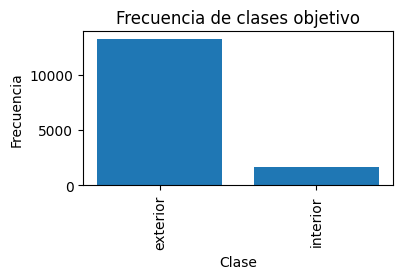

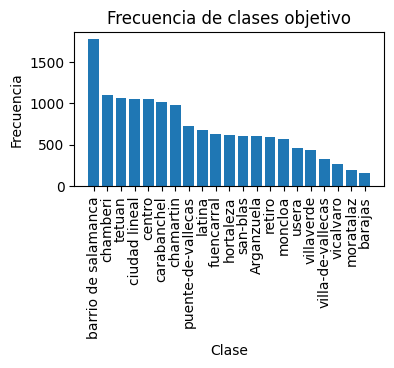

In [23]:
for cat_column in cat_pred_columns:
  class_counts = data[cat_column].value_counts()
  plt.figure(figsize=(4, 2))
  plt.bar(class_counts.index, class_counts.values)
  plt.xlabel('Clase')
  plt.ylabel('Frecuencia')
  plt.title('Frecuencia de clases objetivo')
  plt.xticks(class_counts.index, [f'{i}' for i in class_counts.index], rotation=90)
  plt.show()

# **Prediction with AdaBoost**

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer

# PIPELINE CONSTRUCTION
# Transformer for numerical columns.
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
])

# Transformer for categorical columns.
# It is important to indicate how to treat new data once the coding is done. This is useful when there is a possibility
# that the new data may contain categories that were not seen during training.
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# We integrate both in a preprocessor with ColumnTransformer, indicating the transformer and the list of columns to apply.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_pred_columns),
        ('cat', categorical_transformer, cat_pred_columns)
    ]
)

# I create the complete pipeline including the estimator.
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', AdaBoostRegressor(
        estimator = DecisionTreeRegressor()
        )
    )
])

In [25]:
# SPLIT BETWEEN PREDICTIVE AND TARGET COLUMNS
# splitting predictive columns from target column
X = data.drop(columns=target_column)
y = data[target_column]

In [26]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

# DIVISION BETWEEN TRAINING DATA AND TEST DATA
# We select a ratio of 80% of the data for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Tamaño datos de entrenamiento:", X_train.shape)
print("Tamaño datos de testeo:", X_test.shape)

Tamaño datos de entrenamiento: (11948, 7)
Tamaño datos de testeo: (2988, 7)


In [27]:
# CONFIGURATION OF THE HYPERPARAMETER SEARCH
# Configure the cross-validation search to find the best hyperparameter values.
metaparameter_list = ['regressor__n_estimators', 'regressor__learning_rate']
param_grid = {
    metaparameter_list[0]: [40, 60, 80],
    metaparameter_list[1]: [0.5, 1, 3],
}

# I configure the GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3, verbose = 1, scoring='neg_mean_squared_error', error_score='raise')

In [28]:
# HYPERPARAMETER SEARCH WITH NESTED VALIDATION.
# This step is independent of the subsequent training, but it is recommended to evaluate the variability of the models in terms of
# hyperparameter evaluation and selection.

from scipy.stats import mode

n_splits = 4
outer_cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
best_params_list = []
best_scores = []

# Here we are doing a Cross Validation manually. In each iteration (as many as the number of folds indicated) a GridSearchCV will be computed
# with the training set selected in that fold.
for train_index, test_index in outer_cv.split(X_train):
    X_train_fold = X_train.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_train_fold = y_train.iloc[train_index]
    y_test_fold = y_train.iloc[test_index]

    # Execute GridSearchCV
    grid_search.fit(X_train_fold, y_train_fold)

    # Store the best parameters and the best results in each split
    best_params_list.append(grid_search.best_params_)
    best_scores.append(grid_search.best_score_)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [29]:
# EVALUATION OF THE HYPERPARAMETERS OF THE NESTED VALIDATION.
# One loop per fold, indicating the optimal hyperparameter and the best error metric for that iteration.

for split in range(n_splits):
  for metaparameter in metaparameter_list:
    value = best_params_list[split][metaparameter]
    if isinstance(value, (int, float)):
        print(f'Mejor valor en el fold {split} del {metaparameter} en VC anidada: {round(value, 3)}')
    else:
        print(f'Mejor valor en el fold {split} del {metaparameter} en VC anidada: {value}')
  print(f"Mejor RMSE en el fold {split}: {np.round(np.sqrt(-1*best_scores[split]),2)}\n")

# A loop for the statistics of each hyperparameter
for metaparameter in metaparameter_list:
  values = [value[metaparameter] for value in best_params_list] # Collect the different values returned by each fold
  if isinstance(values[0], (int, float)):
    mean = sum(values) / len(values) # Calculate the mean
    std = np.sqrt(sum((value - mean) ** 2 for value in values) / len(values)) # Calculate the Standard Deviation
    print(f'Promedio de las puntuaciones {metaparameter} en VC anidada: {round(mean,3)}')
    print(f'Desviación Típica de las puntuaciones {metaparameter} en VC anidada: {round(std,3)}\n')
  else:
    unique_values, counts = np.unique(values, return_counts=True) # Values and their frequency in values
    max_index = np.argmax(counts) # Value index with the highest frequency
    mode = unique_values[max_index]
    count = counts[max_index]
    print(f'Moda de las puntuaciones {metaparameter} en VC anidada: {mode}')
    print(f'Frecuencia de la moda de las puntuaciones {metaparameter} en VC anidada: {count}')


Mejor valor en el fold 0 del regressor__n_estimators en VC anidada: 80
Mejor valor en el fold 0 del regressor__learning_rate en VC anidada: 0.5
Mejor RMSE en el fold 0: 250079.0

Mejor valor en el fold 1 del regressor__n_estimators en VC anidada: 40
Mejor valor en el fold 1 del regressor__learning_rate en VC anidada: 1
Mejor RMSE en el fold 1: 262646.85

Mejor valor en el fold 2 del regressor__n_estimators en VC anidada: 80
Mejor valor en el fold 2 del regressor__learning_rate en VC anidada: 0.5
Mejor RMSE en el fold 2: 256279.87

Mejor valor en el fold 3 del regressor__n_estimators en VC anidada: 40
Mejor valor en el fold 3 del regressor__learning_rate en VC anidada: 1
Mejor RMSE en el fold 3: 260451.1

Promedio de las puntuaciones regressor__n_estimators en VC anidada: 60.0
Desviación Típica de las puntuaciones regressor__n_estimators en VC anidada: 20.0

Promedio de las puntuaciones regressor__learning_rate en VC anidada: 0.75
Desviación Típica de las puntuaciones regressor__learnin

In [30]:
# HYPERPARAMETER SEARCH WITHOUT NESTED VALIDATION
# I train now with GridSearchCV without nesting.ia
grid_search.fit(X_train, y_train)

# Show best score and best parameters. We can compare them to those values obtained in the nested cross-validation.
for metaparameter in metaparameter_list:
  value = grid_search.best_params_[metaparameter]
  if isinstance(value, (int, float)):
    print(f'Mejor puntuación de {metaparameter} en VC: {round(grid_search.best_params_[metaparameter],3)}')
  else:
    print(f'Mejor valor de {metaparameter} en VC: {value}')
print("Mejor RMSE:", np.round(np.sqrt(grid_search.best_score_),2))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Mejor puntuación de regressor__n_estimators en VC: 40
Mejor puntuación de regressor__learning_rate en VC: 1
Mejor RMSE: nan


**MODEL TESTING**

In [31]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

**MODEL EVALUATION**

In [32]:
# Evaluation of the model on the test set. Notice how it is necessary to pass both our predictions
# and_pred as well as the actual values of the target variable y_test.

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = round(mean_absolute_error(y_test, y_pred),2)
mse = round(mean_squared_error(y_test, y_pred),2)
rmse = round(np.sqrt(mse),2)
r2 = round(r2_score(y_test, y_pred),3)

print(f"Mean Absolute Error (MAE) en el conjunto de testeo: {mae}")
print(f"Mean Squared Error (MSE) en el conjunto de testeo: {mse}")
print(f"Root Mean Squared Error (RMSE) en el conjunto de testeo: {rmse}")
print(f"R-squared (R2) en el conjunto de testeo: {r2}")

Mean Absolute Error (MAE) en el conjunto de testeo: 94336.05
Mean Squared Error (MSE) en el conjunto de testeo: 48693218545.09
Root Mean Squared Error (RMSE) en el conjunto de testeo: 220665.4
R-squared (R2) en el conjunto de testeo: 0.885


**We will make predictions based on our model**

In [33]:
# We can make a prediction with respect to a floor of the dataset, to check how reliable our model is.
sample_0 = X_train.iloc[[0]] 
predict_0 = best_model.predict(sample_0)
print("Predicción: ", predict_0)
print("Precio real: ", y_train.iloc[0])
print("Error de predicción: ", predict_0-y_train.iloc[0])

Predicción:  [165500.]
Precio real:  165500.0
Error de predicción:  [0.]


**Price prediction of a new apartment**

In [34]:
# As we are going to have to correctly indicate the data, I am going to remember which are the different districts that we have stored:

print(data['district'].value_counts())

district
barrio de salamanca    1773
chamberi               1096
tetuan                 1071
ciudad lineal          1054
centro                 1047
carabanchel            1015
chamartin               985
puente-de-vallecas      730
latina                  678
fuencarral              631
hortaleza               622
san-blas                607
Arganzuela              605
retiro                  591
moncloa                 565
usera                   463
villaverde              442
villa-de-vallecas       330
vicalvaro               273
moratalaz               198
barajas                 160
Name: count, dtype: int64


In [35]:
sample_1 = {
    'rooms': 3,
    'm2': 50,
    'elevator': 1,
    'garage': 0,
    'floor': 3,
    'int/ext': 'exterior',
    'district': 'barajas'
}

sample_1 = pd.DataFrame([sample_1])
predict_1 = 1.15 * best_model.predict(sample_1)  # As the sample data was collected in 2022, I will increase the price by 15%, which is, more or less, what the price of housing in Madrid has risen in 2 years.
print("\nPredicción: ",predict_1)


Predicción:  [178250.]
